# Verlet Algorithm

The Verlet algorithm is a numerical method used to integrate Newton's equations of motion. It is a symplectic integrator, which means that it conserves energy. The Verlet algorithm is used to simulate the motion of particles in a potential field. It is widely used in molecular dynamics simulations and other areas of physics.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Lenard-Jones Potential

The Lenard-Jones potential is a mathematical model that describes the interaction between two neutral atoms or molecules. It is used to model the interatomic forces in molecular dynamics simulations. The Lenard-Jones potential is given by the following equation:

In [42]:
def lenard_jones_potential_energy(x):
    return 4 * ((1 / x ** 12) - (1 / x ** 6))


In [43]:
def U(x):
    return (48 / x ** 13) - (24 / x ** 7)

In [45]:
def verlet_integration(acc, v0, x0, dt, steps):
    n = int(steps/dt)
    x_trajectory = np.zeros(n)
    v_trajectory = np.zeros(n)
    t_trajectory = np.zeros(n)
    total_energy = np.zeros(n)

    x = x0
    v = v0
    t = 0
    acceleration = lenard_jones_potential_energy(x)

    for i in range(n):
        v_half = v + dt * acceleration * 0.5
        x = x + dt * v_half
        new_acceleration = lenard_jones_potential_energy(x)
        v = v_half + 0.5 * dt * (new_acceleration + acceleration)
        acceleration = new_acceleration
        x_trajectory[i] = x
        v_trajectory[i] = v
        t_trajectory[i] = t
        total_energy[i] = 0.5 * v ** 2 + lenard_jones_potential_energy(x)
        t += dt

    return x_trajectory, v_trajectory, t_trajectory, total_energy


In [46]:
# def verlet_integration(v0, x0, dt, steps):
#     times = np.arange(0, steps, dt)
#     number_of_steps = (len(times))
#
#     m = 1
#     # Position
#     x = np.zeros(number_of_steps)
#     # Velocity
#     v = np.zeros(number_of_steps)
#
#     acceleration = np.zeros(number_of_steps)
#     kinetic_energy = np.zeros(number_of_steps)
#     potential_energy = np.zeros(number_of_steps)
#     total_energy = np.zeros(number_of_steps)
#
#     v[0] = v0
#     x[0] = x0
#     acceleration[0] = U(x0) / m
#
#     for n in range(number_of_steps - 1):
#         v_half = v[n] + dt * (acceleration[n] / 2)
#         x[n + 1] = x[n] + dt * v_half
#         new_acceleration = U(x[n]) / m
#         v[n + 1] = v_half + 0.5 * dt * new_acceleration
#
#         kinetic_energy[n + 1] = 0.5 * m * ((v[n + 1]) ** 2)
#         potential_energy[n + 1] = 0.5 * (U(x[n + 1]) ** 2)
#         total_energy[n] = kinetic_energy[n] + potential_energy[n]
#
#     return times, x, v, kinetic_energy, potential_energy, total_energy

Initializing the parameters for the Verlet Algorithm

In [47]:
x0 = 2.0
v0 = 0.0
n = 100
dt_values = [0.0001]

Plotting the results of the Verlet Algorithm

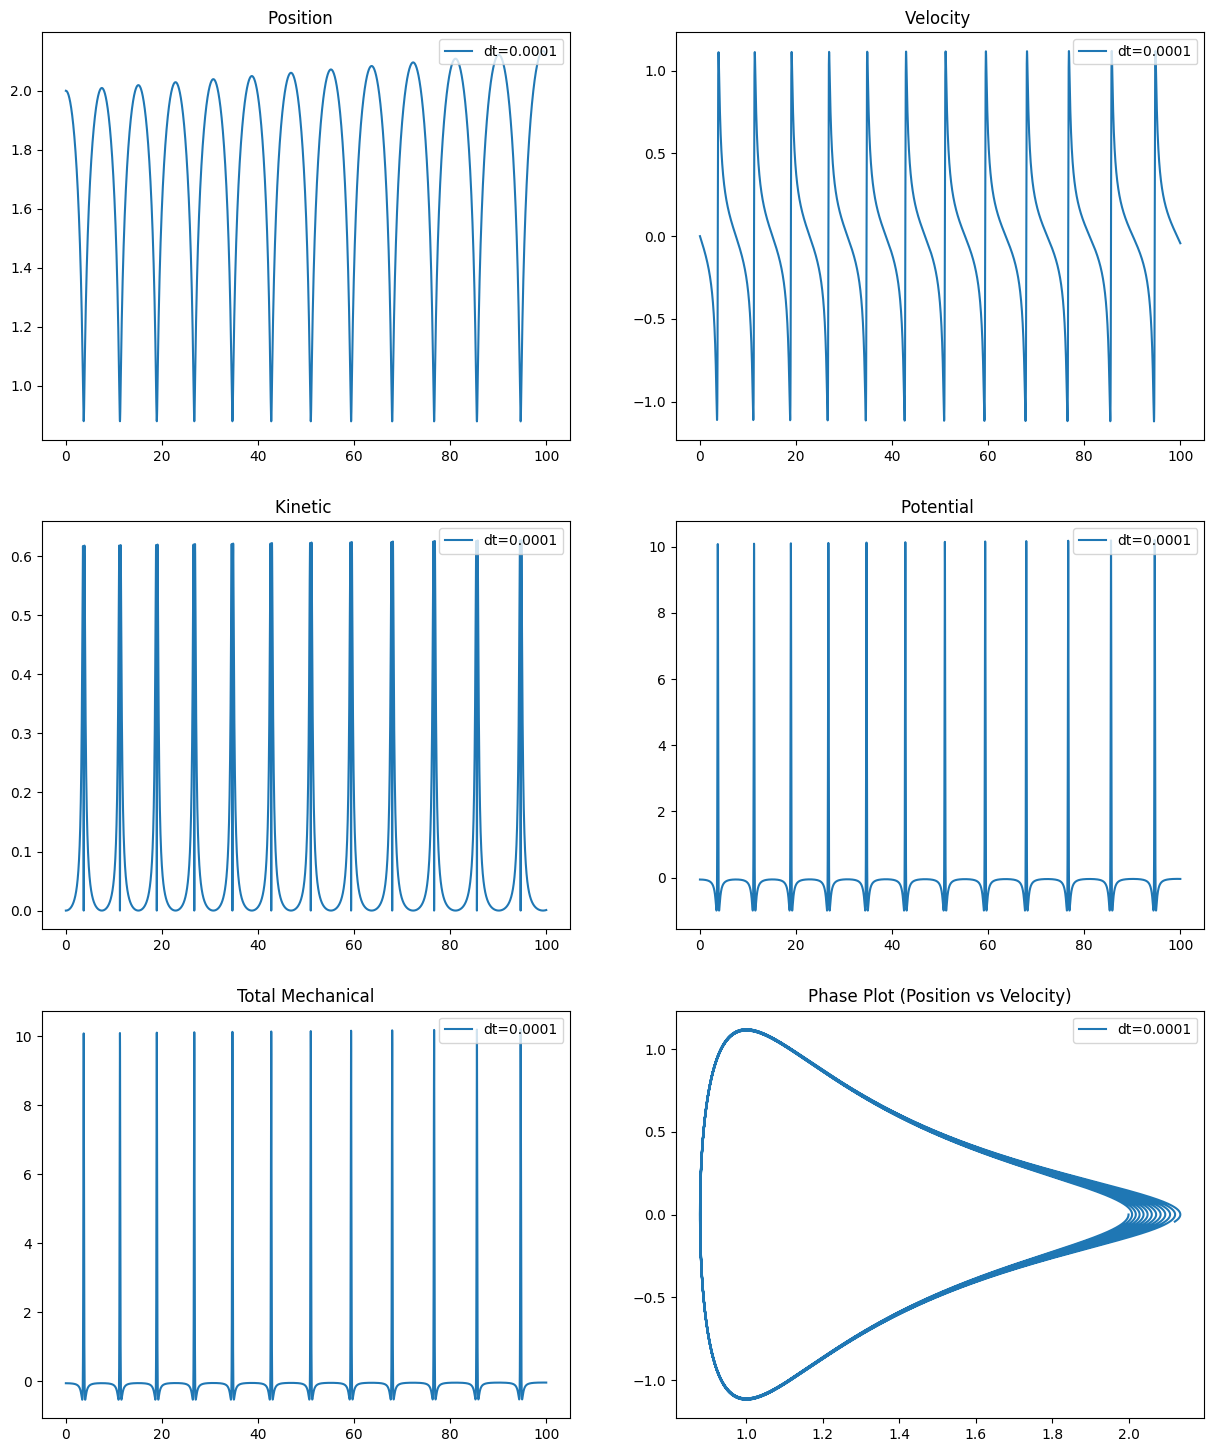

In [48]:
figure, axis = plt.subplots(3, 2, figsize=(15, 18))

for dt in dt_values:
    x_trajectory, v_trajectory, t_trajectory, total_energy = verlet_integration(acc, v0, x0, dt, n)
    kinetic_energy = 0.5 * v_trajectory ** 2
    potential_energy = lenard_jones_potential_energy(x_trajectory)

    axis[0, 0].plot(t_trajectory, x_trajectory, label=f"dt={dt}")
    axis[0, 1].plot(t_trajectory, v_trajectory, label=f"dt={dt}")
    axis[1, 0].plot(t_trajectory, kinetic_energy, label=f"dt={dt}")
    axis[1, 1].plot(t_trajectory, potential_energy, label=f"dt={dt}")
    axis[2, 0].plot(t_trajectory, total_energy, label=f"dt={dt}")
    axis[2, 1].plot(x_trajectory, v_trajectory, label=f"dt={dt}")

axis[0, 0].set_title("Position  ")
axis[0, 1].set_title("Velocity ")
axis[1, 0].set_title("Kinetic ")
axis[1, 1].set_title("Potential ")
#Something is wrong with the total energy plot
axis[2, 0].set_title("Total Mechanical")
axis[2, 1].set_title("Phase Plot (Position vs Velocity)")

for ax in axis.flat:
    ax.legend(loc="upper right")